In [4]:
import pandas as pd
from google.colab import drive
from pandas_profiling import ProfileReport
from datetime import date, datetime
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import re
import numpy as np 
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pytz
import urllib.request
import glob
import os
import time

from sklearn.ensemble import *
from sklearn.tree import *
from sklearn.feature_selection import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.naive_bayes import *
from sklearn.svm import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.metrics import *

In [2]:
drive.mount('/content/gdrive')
%cd gdrive/My Drive/bhl/

Mounted at /content/gdrive
/content/gdrive/My Drive/bhl


In [5]:
df = pd.read_csv('final_train.csv', index_col=0).dropna(how='any')

X = df.drop(['Activity'],axis=1)
y = df['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

clf = RandomForestClassifier(random_state=0)

s = time.time()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
e = time.time()
print(f"time consumed: {round(e-s,3)}")
f1_score(y_true=y_test,y_pred=y_pred,average="macro")

time consumed: 11.259


0.9880057516003135

In [6]:
importance = pd.Series(clf.feature_importances_, index=X.columns)

Text(0, 0.5, 'Feature')

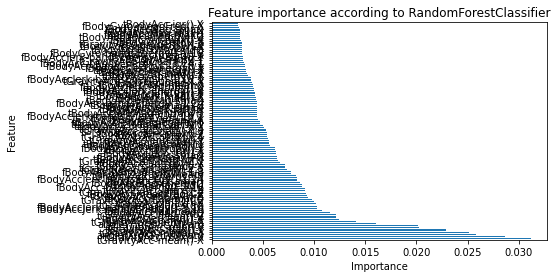

In [7]:
fig = importance.nlargest(100).plot(kind='barh')

fig.set_title("Feature importance according to RandomForestClassifier")
fig.set_xlabel("Importance")
fig.set_ylabel("Feature")

In [8]:
# important_cols = importance.loc[lambda x : x > 0.005].index.to_series()
# not_important_cols = importance.loc[lambda x : x <= 0.005].index.to_series()

important_cols = importance.nlargest(100).index.to_series()
not_important_cols = importance.nsmallest(100).index.to_series()

print(len(important_cols))
print(len(not_important_cols))
# print(important_cols)
# print(not_important_cols)

100
100


In [11]:
WORDS_SPACE_REGEX = re.compile(r'[^\w]')

def preproces_text(text):
    text = WORDS_SPACE_REGEX.sub(" ", text)
    text = text.lower()
    return text

In [12]:
X = important_cols.apply(preproces_text).tolist()

model = CountVectorizer(max_features=10, lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))

tf_idf = model.fit_transform(X)

most_important = model.get_feature_names()

In [13]:
X = not_important_cols.apply(preproces_text).tolist()

model = CountVectorizer(max_features=10, lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))

tf_idf = model.fit_transform(X)

least_important = model.get_feature_names()

In [14]:
print("Most important keywords:")
print(most_important)
print("Least important keywords:")
print(least_important)
print("Diffrence (most-least):")
print(set(most_important) - set(least_important))
print("Diffrence (least-most):")
print(set(least_important) - set(most_important))

Most important keywords:
['arcoeff', 'bandsenergy', 'energy', 'fbodyacc', 'fbodyaccjerk', 'iqr', 'max', 'std', 'tbodyaccjerk', 'tgravityacc']
Least important keywords:
['48', '49', '64', 'arcoeff', 'bandsenergy', 'fbodyacc', 'fbodyaccjerk', 'fbodygyro', 'min', 'tbodygyro']
Diffrence (most-least):
{'energy', 'iqr', 'tgravityacc', 'std', 'tbodyaccjerk', 'max'}
Diffrence (least-most):
{'48', 'tbodygyro', '64', 'min', '49', 'fbodygyro'}
